In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [11]:
#preprossesing data

from sklearn.preprocessing import StandardScaler

X = df.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df_scaled = pd.DataFrame(X_scaled, columns=df.columns)

# cek statistik data 
print(df_scaled.describe().round(2))

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count             150.00            150.00             150.00   
mean               -0.00             -0.00              -0.00   
std                 1.00              1.00               1.00   
min                -1.87             -2.43              -1.57   
25%                -0.90             -0.59              -1.23   
50%                -0.05             -0.13               0.34   
75%                 0.67              0.56               0.76   
max                 2.49              3.09               1.79   

       petal width (cm)  
count            150.00  
mean              -0.00  
std                1.00  
min               -1.45  
25%               -1.18  
50%                0.13  
75%                0.79  
max                1.71  


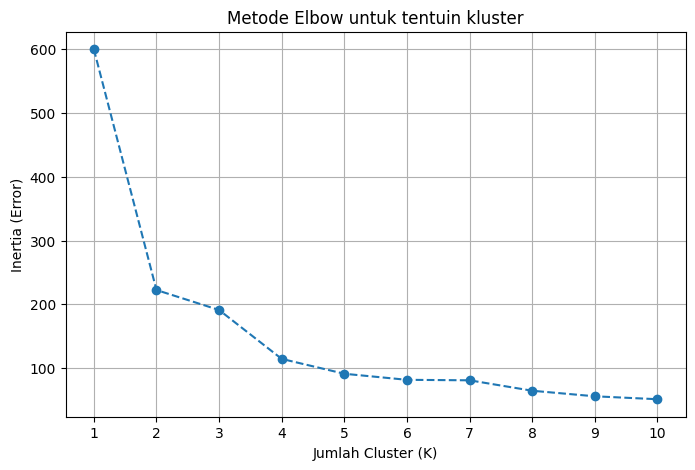

In [12]:
# list untuk nampung inertia 

inertia_values = []

k_range = range(1, 11)

for k in k_range:
    model = KMeans (n_clusters=k, random_state=42)
    model.fit (df_scaled)
    inertia_values.append(model.inertia_)

# grafik elbow method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_values, marker='o', linestyle='--')
plt.title('Metode Elbow untuk tentuin kluster')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia (Error)')
plt.xticks(k_range)
plt.grid()
plt.show()

In [13]:
# model dengan  3 cluster 
kmeans= KMeans(n_clusters=3, random_state=42)

# latih model dengan data 
kmeans.fit(df_scaled)

# masukin ke label 0, 1, 2
labels = kmeans.labels_

# hasil prediksi 
df['Cluster_Result'] = labels 

# tampilkan data acak
print(df.sample(10))

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
92                 5.8               2.6                4.0               1.2   
115                6.4               3.2                5.3               2.3   
140                6.7               3.1                5.6               2.4   
5                  5.4               3.9                1.7               0.4   
28                 5.2               3.4                1.4               0.2   
135                7.7               3.0                6.1               2.3   
134                6.1               2.6                5.6               1.4   
141                6.9               3.1                5.1               2.3   
69                 5.6               2.5                3.9               1.1   
21                 5.1               3.7                1.5               0.4   

     Cluster_Result  
92                0  
115               0  
140               0  
5                 1 

In [14]:
# Mengelompokkan data berdasarkan hasil cluster, lalu hitung rata-ratanya
print(df.groupby('Cluster_Result').mean())

                sepal length (cm)  sepal width (cm)  petal length (cm)  \
Cluster_Result                                                           
0                        6.314583          2.895833           4.973958   
1                        5.169697          3.630303           1.493939   
2                        4.747619          2.895238           1.757143   

                petal width (cm)  
Cluster_Result                    
0                       1.703125  
1                       0.272727  
2                       0.352381  


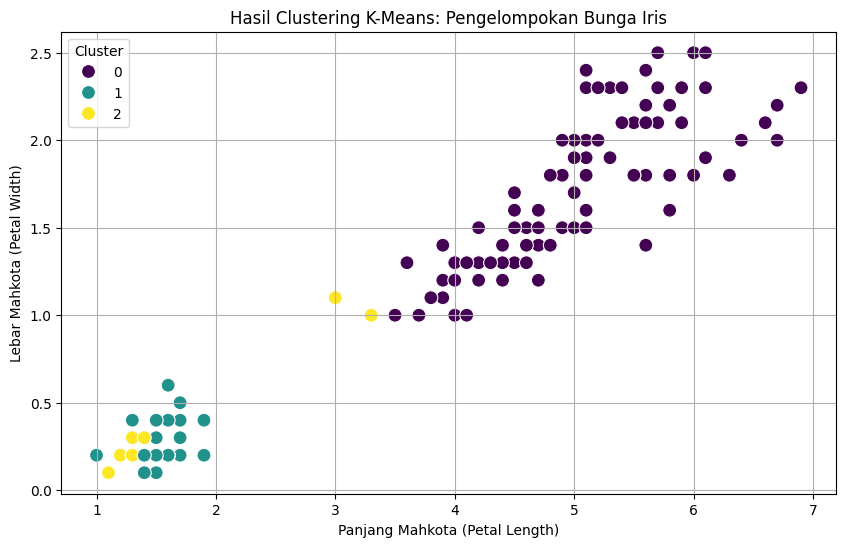

In [21]:
plt.figure(figsize=(10, 6))

# Buat Scatter Plot
#  X= Panjang Mahkota, Y = Lebar Mahkota, Warna = Hasil Cluster
sns.scatterplot(
    data=df,
    x='petal length (cm)',
    y='petal width (cm)',
    hue='Cluster_Result',
    palette='viridis',
    s=100
)

plt.title('Hasil Clustering K-Means: Pengelompokan Bunga Iris')
plt.xlabel('Panjang Mahkota (Petal Length)')
plt.ylabel('Lebar Mahkota (Petal Width)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [22]:
# Petakan angka 0,1,2 ke nama asli agar mudah dibaca
df['Actual_Species'] = [iris.target_names[i] for i in iris.target]

# Buat tabel silang: Baris (Fakta) vs Kolom (Tebakan Mesin)
print(pd.crosstab(df['Actual_Species'], df['Cluster_Result']))

Cluster_Result   0   1   2
Actual_Species            
setosa           0  33  17
versicolor      46   0   4
virginica       50   0   0
